# Group 3 Members:
- Samuel Amihere (Group leader)
- Theophilus Yao Dortumor
- Rachael Adongo
- Priscilla Kottoh
- Dennis Awer Mensah
    

# Task
- Implement a linear regression predictor from scratch to predict the fire radiation power of various fires in Australia

# Steps
- Import necessary packages
- load the data
- perform EDA
- Preprocess the data
- Build and select best Model
- predict the frp of Australia

# Importing Necessary Packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,
        font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import hvplot.pandas
%matplotlib inline
import matplotlib.pyplot as plt

#### Loading The Data

In [2]:
dataset_tr = pd.read_csv('train.csv')
dataset_val = pd.read_csv('dev.csv')
dataset_te = pd.read_csv('test.csv')

# Exploaratory data Analysis (EDA)

In [3]:
dataset_te.shape

(15001, 14)

In [4]:
dataset_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25001 entries, 0 to 25000
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25001 non-null  int64  
 1   latitude    25001 non-null  float64
 2   longitude   25001 non-null  float64
 3   brightness  25001 non-null  float64
 4   scan        25001 non-null  float64
 5   track       25001 non-null  float64
 6   acq_date    25001 non-null  object 
 7   acq_time    25001 non-null  int64  
 8   satellite   25001 non-null  object 
 9   instrument  25001 non-null  object 
 10  confidence  25001 non-null  int64  
 11  version     25001 non-null  object 
 12  bright_t31  25001 non-null  float64
 13  frp         25001 non-null  float64
 14  daynight    25001 non-null  object 
dtypes: float64(7), int64(3), object(5)
memory usage: 2.9+ MB


In [5]:
dataset_tr=dataset_tr.drop(columns= 'Unnamed: 0')

In [6]:
dataset_val=dataset_val.drop(columns='Unnamed: 0')

In [7]:
dataset_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15001 entries, 0 to 15000
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          15001 non-null  int64  
 1   latitude    15001 non-null  float64
 2   longitude   15001 non-null  float64
 3   brightness  15001 non-null  float64
 4   scan        15001 non-null  float64
 5   track       15001 non-null  float64
 6   acq_date    15001 non-null  object 
 7   acq_time    15001 non-null  int64  
 8   satellite   15001 non-null  object 
 9   instrument  15001 non-null  object 
 10  confidence  15001 non-null  int64  
 11  version     15001 non-null  object 
 12  bright_t31  15001 non-null  float64
 13  daynight    15001 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 1.6+ MB


In [8]:
dataset_te=dataset_te.drop(columns='ID')


In [9]:
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

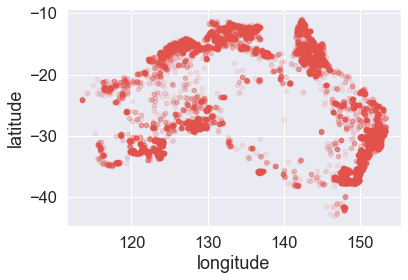

In [10]:
#Visaulising Geographical Data

dataset_tr.plot(kind='scatter', x= 'longitude', y='latitude', alpha=0.1)

This displays the high density areas in Australia where the data set is about. The concentration is around costal areas.


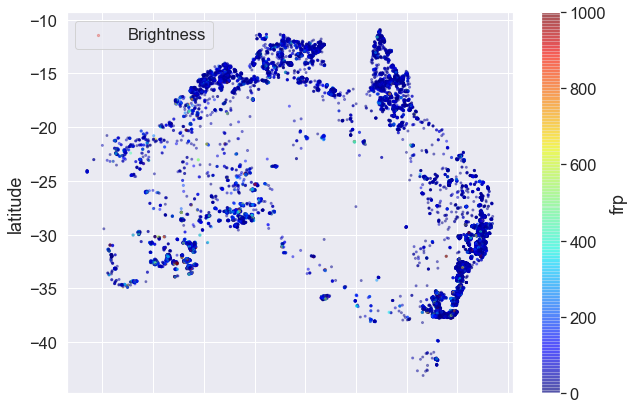

In [11]:
#Australia frp

dataset_tr.plot(kind='scatter', x= 'longitude', y='latitude', alpha=0.4, 
                s=dataset_tr['brightness']/80, label='Brightness', 
                figsize=(10,7), c='frp', cmap=plt.get_cmap('jet'), 
                colorbar=True,vmax=1000)
plt.legend()

- The radius represents the city's brightness level (s), thus, possibly the level of sunshine. 
- The color represents the frp (c). The color map (jet), ranges from blue (low values of frp) to red (high frp).
- Most of the values are all blue (low) 
- There are some few locations where colors are red (high frp)

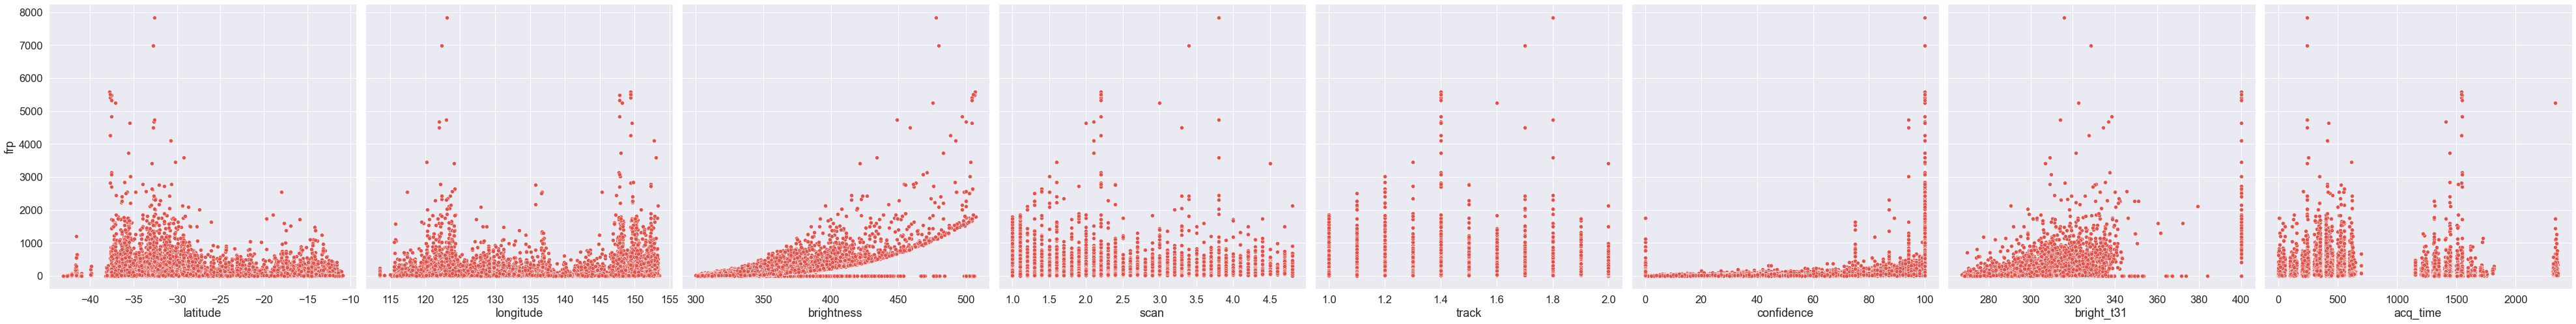

In [12]:
#Correlation Between Variables
#1. Scatterplots

sns.pairplot(dataset_tr, x_vars=['latitude','longitude','brightness', 'scan', 
                          'track', 'confidence', 'bright_t31', 'acq_time'], 
             y_vars='frp', size=7)

In [13]:
#Features having good correlation with frp

In [14]:
dataset_tr.head(1)

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   -25.117    149.245       363.1   1.2    1.1  2019-12-08         0   

  satellite instrument  confidence version  bright_t31    frp daynight  
0     Terra      MODIS         100  6.0NRT       316.6  102.6        D

In [15]:
corr_matrix = dataset_tr.corr()

In [16]:
corr_matrix['frp'].sort_values(ascending=False)

frp           1.000000
brightness    0.638042
bright_t31    0.386822
confidence    0.249365
scan          0.186877
track         0.181642
longitude    -0.064630
acq_time     -0.085942
latitude     -0.095640
Name: frp, dtype: float64

- The small negative correlation between latitude and frp indicates that when there is frp will have small probility to go down when you move to the upper part of Australia. 
- The correlation is very strong between frp and brightness

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='brightness', ylabel='frp'>

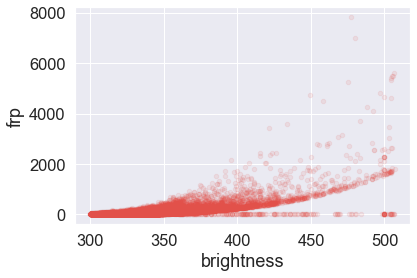

In [17]:
#1. brightness VS frp

dataset_tr.plot(kind='scatter', x='brightness', y='frp', alpha = 0.1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='brightness', ylabel='frp'>

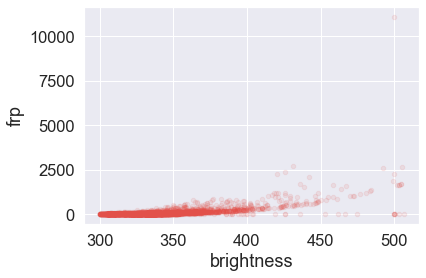

In [18]:
dataset_val.plot(kind='scatter', x='brightness', y='frp', alpha = 0.1)

In [19]:
dataset_tr = dataset_tr[['frp','brightness', 'scan', 'track', 'confidence', 
                     'bright_t31', 'latitude', 'longitude', 'daynight']]
dataset_val = dataset_val[['frp','brightness', 'scan', 'track', 'confidence', 
                     'bright_t31', 'latitude', 'longitude', 'daynight']]
dataset_te = dataset_te[['brightness', 'scan', 'track', 'confidence', 
                     'bright_t31', 'latitude', 'longitude', 'daynight']]

In [20]:
dataset_tr_X = dataset_tr.drop(columns='frp')
dataset_tr_y = dataset_tr['frp'].copy()

dataset_val_X = dataset_val.drop(columns='frp')
dataset_val_y = dataset_val['frp'].copy()

# dataset_te_X = dataset_te.drop(columns='frp')
# dataset_te_y = dataset_te[['frp']].copy()


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

In [21]:
num_tr_X = dataset_tr_X.drop(columns='daynight')
num_val_X= dataset_val.drop(columns='daynight')
# num_te_X= dataset_te.drop(columns='daynight')

In [22]:
#get the category(daynight)

cat_tr_X=dataset_tr[['daynight']].copy()

cat_val_X=dataset_val[['daynight']].copy()
# cat_te_X=dataset_te[['daynight']].copy()


In [23]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
cat_tr_encoded=ordinal_encoder.fit_transform(cat_tr_X)

In [24]:
# cat_val_encoded=ordinal_encoder.fit_transform(cat_val_X)

In [25]:
# cat_te_encoded=ordinal_encoder.fit_transform(cat_te_X)

In [26]:
cat_tr_encoded[:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [27]:
ordinal_encoder.categories_

[array(['D', 'N'], dtype=object)]

# Preprocessing

In [28]:
#Applying OneHotEncoder since the category is nonoedinal

from sklearn.preprocessing import OneHotEncoder
cat_encoder=OrdinalEncoder()
cat_tr_ohe=cat_encoder.fit_transform(cat_tr_X)

In [29]:
# cat_val_ohe=cat_encoder.fit_transform(cat_val_X)

In [30]:
# cat_te_ohe=cat_encoder.fit_transform(cat_te_X)

In [31]:
cat_tr_ohe

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [32]:
#Transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline=Pipeline([
    ('std_scaler', StandardScaler()),
])


In [33]:
#Transforming columns
#num_pipeline transforms the numerical columns of dataset_tr(num_tr_X)
#OneHotEncoder is applied on the categorical columns of dataset_tr
#ColumnTransformer is finally applied. this helps to applied appropriate
#transformations to the num and cat of the data without doing them separately

from sklearn.compose import ColumnTransformer
num_attribs=list(num_tr_X)
cat_attribs=['daynight']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [34]:
dataset_tr_prepared = full_pipeline.fit_transform(dataset_tr_X)#X_train

In [35]:
#Use the full_pipeline to transform the validation data set as well 
dataset_val_prepared = full_pipeline.fit_transform(dataset_val_X) 

In [36]:
print('Training set of X:', dataset_tr_prepared.shape,
      '\nValidation set X: ',dataset_val_prepared.shape,'\n')
print('-'*30, '\nTraining set of y:', dataset_tr_y.shape,
     '\nValidation set y: ',dataset_val_y.shape)

Training set of X: (25001, 9) 
Validation set X:  (4001, 9) 

------------------------------ 
Training set of y: (25001,) 
Validation set y:  (4001,)


In [37]:
dataset_tr_prepared

array([[ 0.85526717, -0.49221646, -0.4288753 , ...,  0.66280348,
         1.        ,  0.        ],
       [ 0.36710172,  2.2554455 ,  2.01588502, ..., -1.6781269 ,
         1.        ,  0.        ],
       [-0.07861456, -0.74200391, -0.83633535, ...,  0.44062662,
         0.        ,  1.        ],
       ...,
       [-0.58092973, -0.74200391, -0.83633535, ..., -1.1652168 ,
         0.        ,  1.        ],
       [-0.77902585,  0.00735844, -0.02141524, ...,  0.77501948,
         0.        ,  1.        ],
       [ 0.65009618, -0.61711018, -0.83633535, ..., -1.18731721,
         1.        ,  0.        ]])

In [38]:
dataset_tr_prepared

array([[ 0.85526717, -0.49221646, -0.4288753 , ...,  0.66280348,
         1.        ,  0.        ],
       [ 0.36710172,  2.2554455 ,  2.01588502, ..., -1.6781269 ,
         1.        ,  0.        ],
       [-0.07861456, -0.74200391, -0.83633535, ...,  0.44062662,
         0.        ,  1.        ],
       ...,
       [-0.58092973, -0.74200391, -0.83633535, ..., -1.1652168 ,
         0.        ,  1.        ],
       [-0.77902585,  0.00735844, -0.02141524, ...,  0.77501948,
         0.        ,  1.        ],
       [ 0.65009618, -0.61711018, -0.83633535, ..., -1.18731721,
         1.        ,  0.        ]])

# Model Building

### Training and Evaluating on the Training Set

In [39]:
#X_train: dataset_tr_prepared
#y_train: dataset_tr_y
#X_test: dataset_val_prepared
#y_test: dataset_val_y

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(dataset_tr_prepared, dataset_tr_y)

LinearRegression()

In [40]:
#Model Assessment

""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

In [41]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
    
def cross_val(model, X,y):
    pred = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    return pred.mean()
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [42]:
#Model Performance

dataset_tr_y_pred = lin_reg.predict(dataset_tr_prepared)#Train
dataset_val_y_pred = lin_reg.predict(dataset_val_prepared)#Test

print('Train: \n') 
print(print_evaluate(dataset_tr_y, dataset_tr_y_pred), '\n','"'*70)
print('Test: \n')
print(print_evaluate(dataset_val_y, dataset_val_y_pred))

Train: 

MAE: 65.21455672774519
MSE: 26033.807890900578
RMSE: 161.3499547285359
R2 Square 0.5267699494124429
__________________________________
None 
 """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Test: 

MAE: 65.58721725659942
MSE: 39068.676677121926
RMSE: 197.65797903733088
R2 Square 0.40144020657898816
__________________________________
None


In [43]:
#"""""""""""""""""""""""""""""""""""""""""""
# Evaluation with Cross Validation         #
#"""""""""""""""""""""""""""""""""""""""""""
#cross_val(lin_reg, dataset_tr_prepared, dataset_tr_y)
def cross_valid(model, X, y):
    from sklearn.model_selection import cross_val_score
    scores=cross_val_score(model, X, y,
                          scoring='neg_mean_squared_error', cv=10)
    cros_val_scores = np.sqrt(-scores)
    print('Cross Validation scores:\n', cros_val_scores, '\n', '-'*75)
    print('Mean:', cros_val_scores.mean(),'\n')
    print('Standard deviation:', scores.std())

#model=lin_reg,   X=dataset_tr_prepared,   y=dataset_tr_y


In [44]:
# Cross Validation Scores in Test Set

cross_valid(lin_reg, dataset_val_prepared, dataset_val_y)

Cross Validation scores:
 [131.81880408 114.43309614 150.51791605 111.39630706 144.51658837
 145.3039226  516.12662222 141.20653818  65.39202172  92.83282349] 
 ---------------------------------------------------------------------------
Mean: 161.35446399084003 

Standard deviation: 75451.7904706292


In [45]:
#Coefficients of the regression model
lin_reg.coef_

array([192.07410295,  31.23944937,  35.11421693, -34.86086321,
        13.4937466 ,  -2.22432782,   4.96823784, -63.0203518 ,
        63.0203518 ])

In [46]:
#Intercept of the regression model
lin_reg.intercept_

108.63610299748707

### Graph Showing the predicted and actual in Linear Regression

<Figure size 1800x720 with 0 Axes>

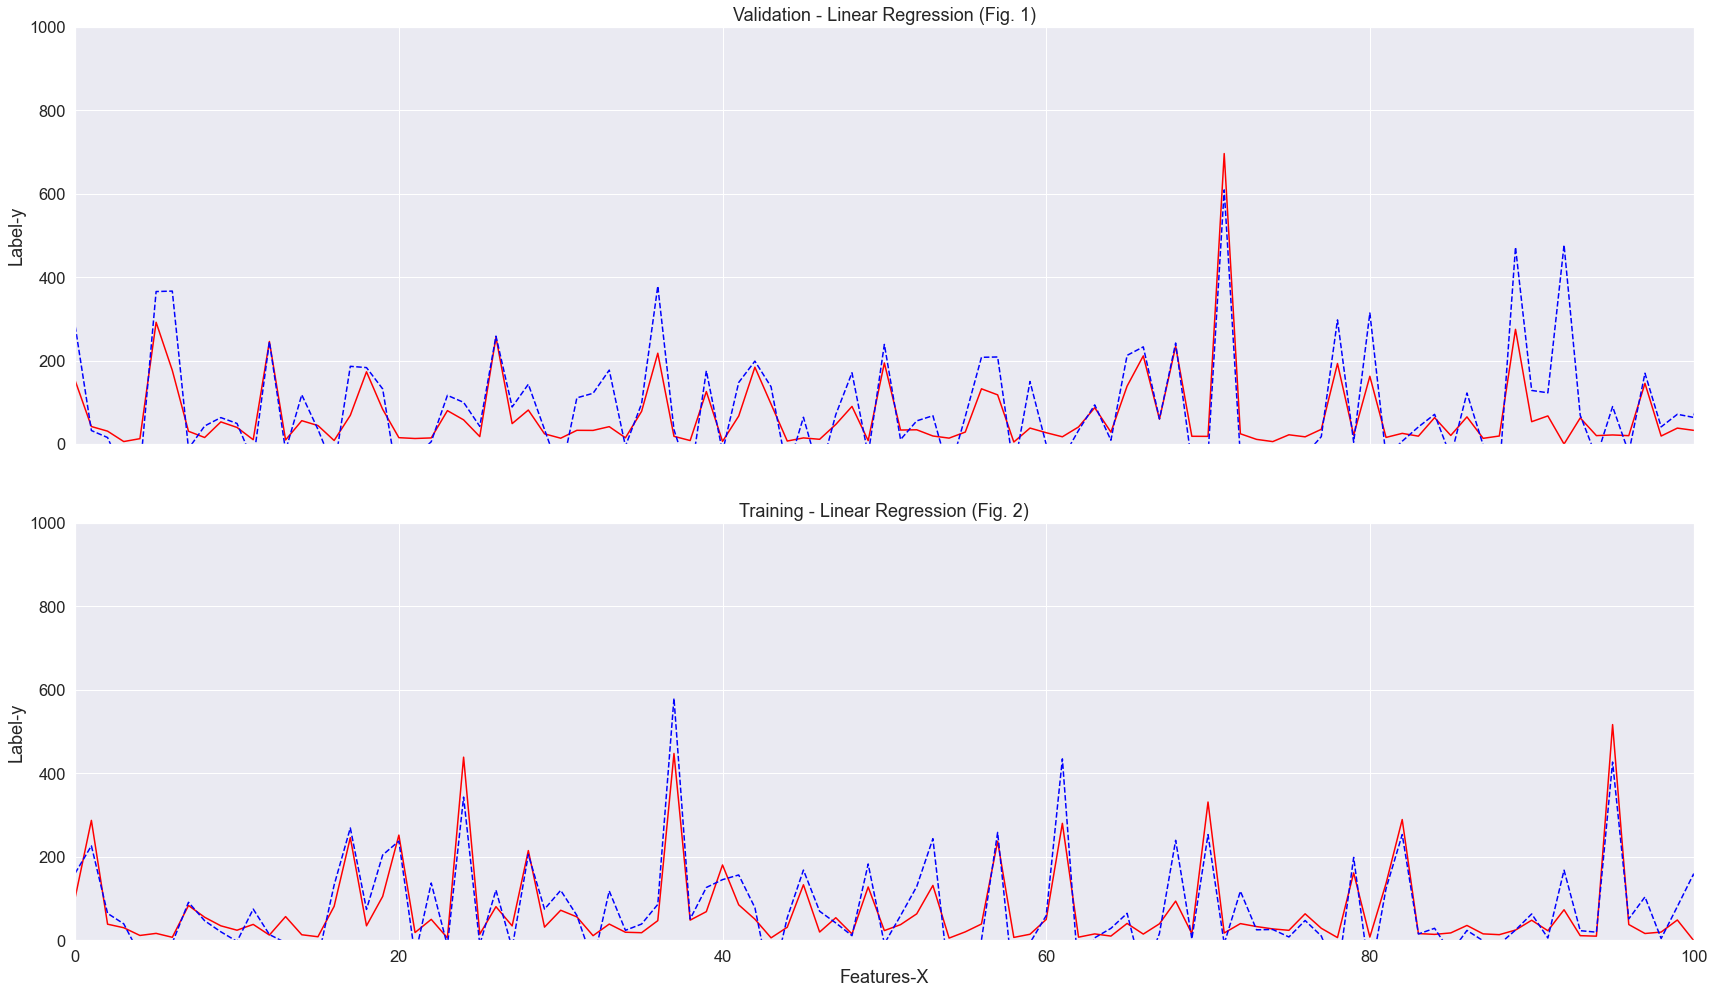

In [47]:
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# Comparing Graphs FROM LinearRegression model

test_pred = lin_reg.predict(dataset_val_prepared)
train_pred = lin_reg.predict(dataset_tr_prepared)

plt.figure(figsize = [25, 10])

fig, axs = plt.subplots(2,1, figsize=(25,15), sharex=True)
#Test grapg
axs[0].plot(dataset_val_y, color='red', label="Actual")
axs[0].plot(test_pred, color='blue', label="predicted test", linestyle='--')
axs[0].set_title("Validation - Linear Regression (Fig. 1)")
axs[0].set_ylabel('Label-y')
axs[0].set_ylim((0,1000))
axs[0].set_xlim((0,100))

#Train graph
axs[1].plot(dataset_tr_y, color='red', label="Actual")
axs[1].plot(train_pred, color='blue', label="predicted train", linestyle='--')
axs[1].set_title("Training - Linear Regression (Fig. 2)")
axs[1].set_ylabel('Label-y')
axs[1].set_xlabel('Features-X')
axs[1].set_ylim((0,1000))
axs[1].set_xlim((0,100))

fig.tight_layout(pad=5.0)
plt.show()

These two graphs show that the model performs better on Traning set (Fig. 2) than on Validation Set (Fig. 1)

## Improving Model Performance: Accuracy and Overfitting

1. **Ridge Regression**
2. **Lasso**

In [48]:
#1. Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge(random_state=0)
ridge_reg.fit(dataset_tr_prepared, dataset_tr_y)

Ridge(random_state=0)

In [49]:
#Model Performance

dataset_tr_y_pred = ridge_reg.predict(dataset_tr_prepared)#Train
dataset_val_y_pred = ridge_reg.predict(dataset_val_prepared)#Test

print('Train: \n') 
print(print_evaluate(dataset_tr_y, dataset_tr_y_pred), '\n','"'*70)
print('Test: \n')
print(print_evaluate(dataset_val_y, dataset_val_y_pred))



Train: 

MAE: 65.21120520025462
MSE: 26033.808142900558
RMSE: 161.34995550944708
R2 Square 0.5267699448317085
__________________________________
None 
 """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Test: 

MAE: 65.58377136723594
MSE: 39068.452268121764
RMSE: 197.65741136654037
R2 Square 0.40144364468378724
__________________________________
None


i. The Ridge Regression Didn't make any impact both in Training and Testing 

------------------------------------------------------------------------------
------------------------------------------------------------------------------

In [50]:
#2. Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(random_state=0)
lasso_reg.fit(dataset_tr_prepared, dataset_tr_y)

Lasso(random_state=0)

In [51]:
#Model Performance

dataset_tr_y_pred = lasso_reg.predict(dataset_tr_prepared)#Train
dataset_val_y_pred = lasso_reg.predict(dataset_val_prepared)#Test

print('Train: \n') 
print(print_evaluate(dataset_tr_y, dataset_tr_y_pred), '\n','"'*70)
print('Test: \n')
print(print_evaluate(dataset_val_y, dataset_val_y_pred))



Train: 

MAE: 64.27731176145468
MSE: 26056.200044316876
RMSE: 161.41932983480285
R2 Square 0.5263629156070786
__________________________________
None 
 """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Test: 

MAE: 64.61444751427665
MSE: 38966.23539493502
RMSE: 197.3986712086356
R2 Square 0.40300967956652556
__________________________________
None


- Lasso reduced Training score by 0.000407. It increased Test score by 0.00157
- Overfitting (Linear Regression was: 0.1253299, Lasso: 0.1233529) 
- The Lasso therefore reduced overfitting by 0.001977 <br><br>
Lasso performs better than Ridge Regression in Reducing our model's overfitting. It's, impact on model improvement is, however, insignificant

3. **Decision Tree**

In [52]:
#Decision Tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(dataset_tr_prepared, dataset_tr_y)

DecisionTreeRegressor(random_state=0)

In [53]:
#Decision Tree Performance

dataset_tr_y_pred = dtr.predict(dataset_tr_prepared)#Train
dataset_val_y_pred = dtr.predict(dataset_val_prepared)#Test

print('Train: \n') 
print(print_evaluate(dataset_tr_y, dataset_tr_y_pred), '\n','"'*70)
print('Test: \n')
print(print_evaluate(dataset_val_y, dataset_val_y_pred))



Train: 

MAE: 6.927514573078054e-19
MSE: 1.9168553254740398e-33
RMSE: 4.378190637094324e-17
R2 Square 1.0
__________________________________
None 
 """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Test: 

MAE: 13.896750812296924
MSE: 7186.909225193702
RMSE: 84.77564051774367
R2 Square 0.8898914612153583
__________________________________
None


Decision Tree gives 100% score on the Training whilest it gives 89% score on the Validat set.
This is bad since there is an overfitting of 11%. Besides, 100% accuracy is not tolerable in the real world

4. **RandomForestRegressor**

In [54]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(dataset_tr_prepared, dataset_tr_y)

RandomForestRegressor(random_state=0)

In [55]:
#Random Forest Performance

dataset_tr_y_pred = forest_reg.predict(dataset_tr_prepared)#Train
dataset_val_y_pred = forest_reg.predict(dataset_val_prepared)#Test

print('Train: \n') 
print(print_evaluate(dataset_tr_y, dataset_tr_y_pred), '\n','"'*70)
print('Test: \n')
print(print_evaluate(dataset_val_y, dataset_val_y_pred))



Train: 

MAE: 3.82430570777169
MSE: 433.89134852217836
RMSE: 20.830058773853192
R2 Square 0.9921129315514992
__________________________________
None 
 """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Test: 

MAE: 10.760769557610596
MSE: 7543.712366239185
RMSE: 86.85454718228162
R2 Square 0.8844249844221677
__________________________________
None


Random Forest has been able to reduce training score from 100% (by Decision Tree) to 99.2%. and the overfitting is 10.8%, lesser than that of Decision Tree (11%)

<Figure size 1800x720 with 0 Axes>

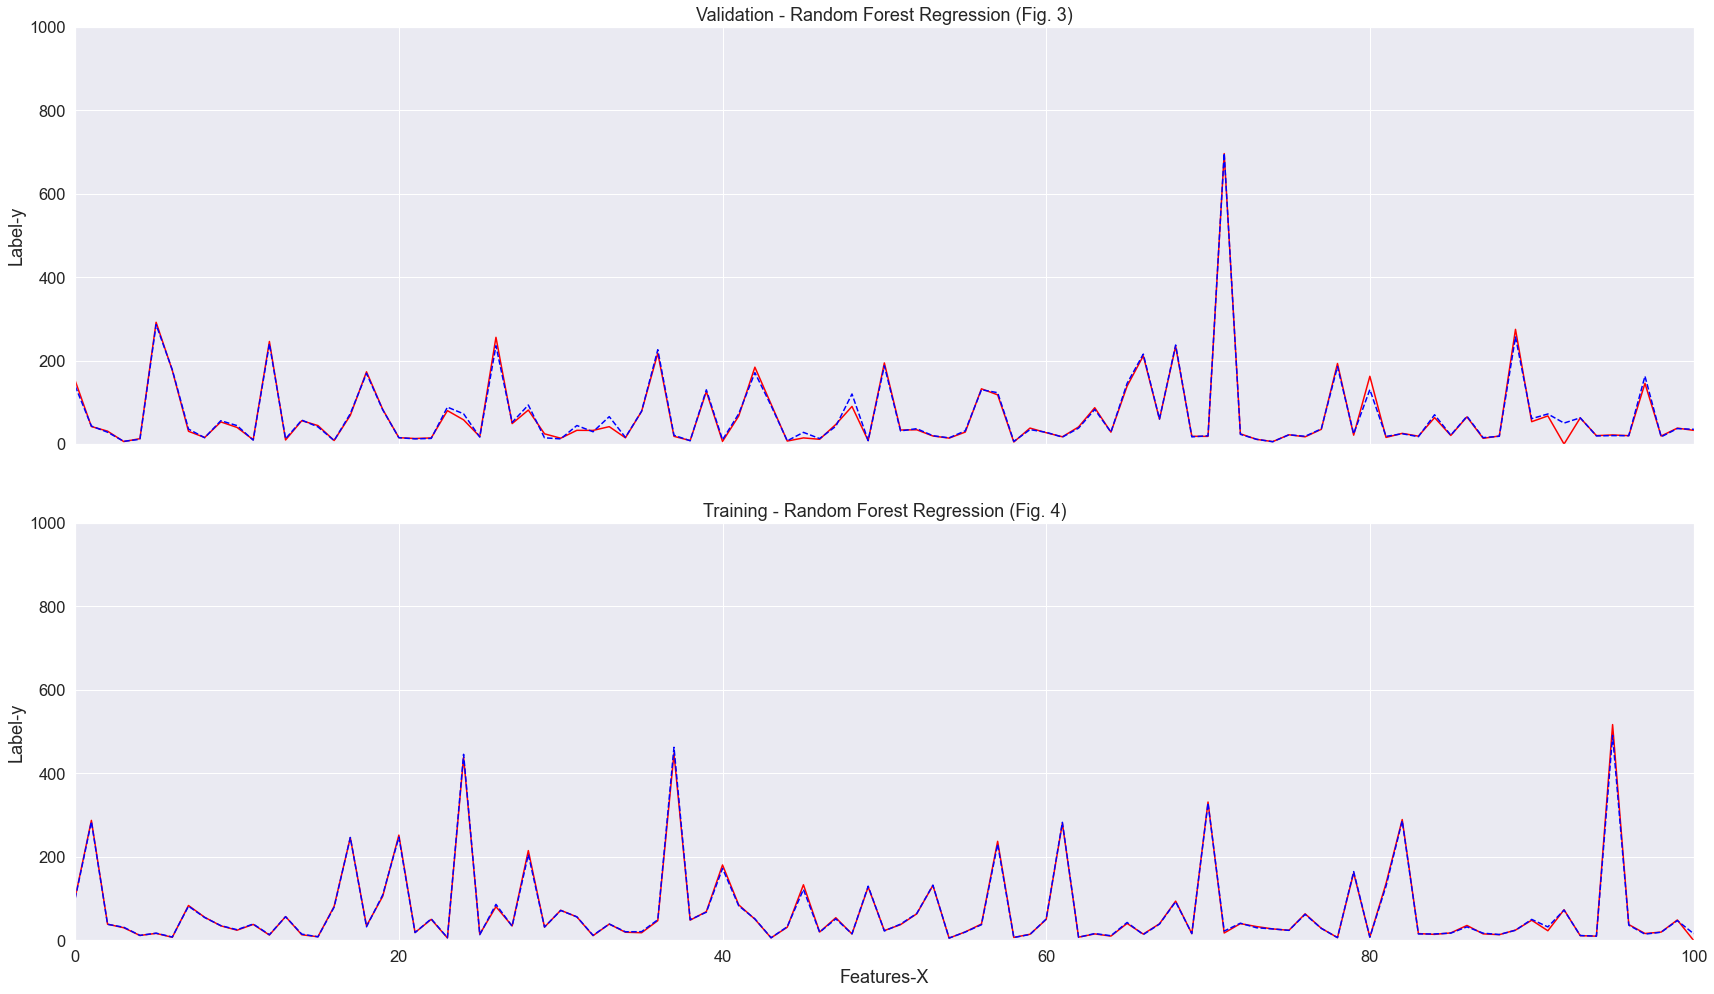

In [56]:
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# Comparing Graphs FROM Random Forest Regression model in Training and 
# Validation

test_pred = forest_reg.predict(dataset_val_prepared)
train_pred = forest_reg.predict(dataset_tr_prepared)

plt.figure(figsize = [25, 10])

fig, axs = plt.subplots(2,1, figsize=(25,15), sharex=True)
#Test grapg
axs[0].plot(dataset_val_y, color='red', label="Actual")
axs[0].plot(test_pred, color='blue', label="predicted test", linestyle='--')
axs[0].set_title("Validation - Random Forest Regression (Fig. 3)")
axs[0].set_ylabel('Label-y')
axs[0].set_ylim((0,1000))
axs[0].set_xlim((0,100))

#Train graph
axs[1].plot(dataset_tr_y, color='red', label="Actual")
axs[1].plot(train_pred, color='blue', label="predicted train", linestyle='--')
axs[1].set_title("Training - Random Forest Regression (Fig. 4)")
axs[1].set_ylabel('Label-y')
axs[1].set_xlabel('Features-X')
axs[1].set_ylim((0,1000))
axs[1].set_xlim((0,100))

fig.tight_layout(pad=5.0)
plt.show()

## Model Tuning (Gridsearch)

1. Decision Tree

In [57]:
from sklearn.model_selection import GridSearchCV
import os, json, codecs, nltk  
from time import time


param_grid = [
    {
    "max_depth" : [1,3,5,7,9,11,12],
    "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
    "min_weight_fraction_leaf":[0, 0.1,0.2,0.3,0.4,0.5],
    }]

dtr = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(dtr, param_grid, cv=5, 
                          return_train_score=True)
grid_search.fit(dataset_tr_prepared, dataset_tr_y)

print("done in {0}s".format(time()))  
print("Best params:\n{}".format(grid_search.best_params_),'\n','-'*55)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test-set score: {:.2f}".format(grid_search.score(dataset_val_prepared,
                                                        dataset_val_y)))


done in 1637696439.7428682s
Best params:
{'max_depth': 12, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0} 
 -------------------------------------------------------
Best cross-validation score: 0.91
Test-set score: 0.84


In [59]:
#Traning Decision Tree with Best Hyperparameters

In [60]:
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

2. Random Forest Regression

In [61]:
from sklearn.model_selection import GridSearchCV
import os, json, codecs, nltk  
from time import time


param_grid = [
    {'n_estimators': [3,10,30],
    'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [1,2,3,4]},
]

forest_reg = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                          return_train_score=True)
grid_search.fit(dataset_tr_prepared, dataset_tr_y)

print("done in {0}s".format(time()))  
print("Best params:\n{}".format(grid_search.best_params_),'\n','-'*55)
print("Best cross-validation score: {}".format(grid_search.best_score_))
print("Test-set score: {}".format(grid_search.score(dataset_val_prepared,
                                                        dataset_val_y)))


done in 1637696872.7739148s
Best params:
{'max_features': 8, 'n_estimators': 30} 
 -------------------------------------------------------
Best cross-validation score: 0.9339011920386341
Test-set score: 0.883747179205743


## Final Best Model From the Gridsearch

In [62]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(max_features=8, n_estimators=30, random_state=0)

In [63]:
final_predictions = final_model.predict(dataset_val_prepared)
final_predictions

array([141.35333333,  42.74333333,  29.12666667, ...,   7.4       ,
        61.88666667,  18.03666667])

##### Graph of Predicted Vs Actual using final best model

MAE: 10.856146796634174
MSE: 7587.953481565717
RMSE: 87.10885994872001
R2 Square 0.883747179205743
__________________________________
Performance of the final model:
 None


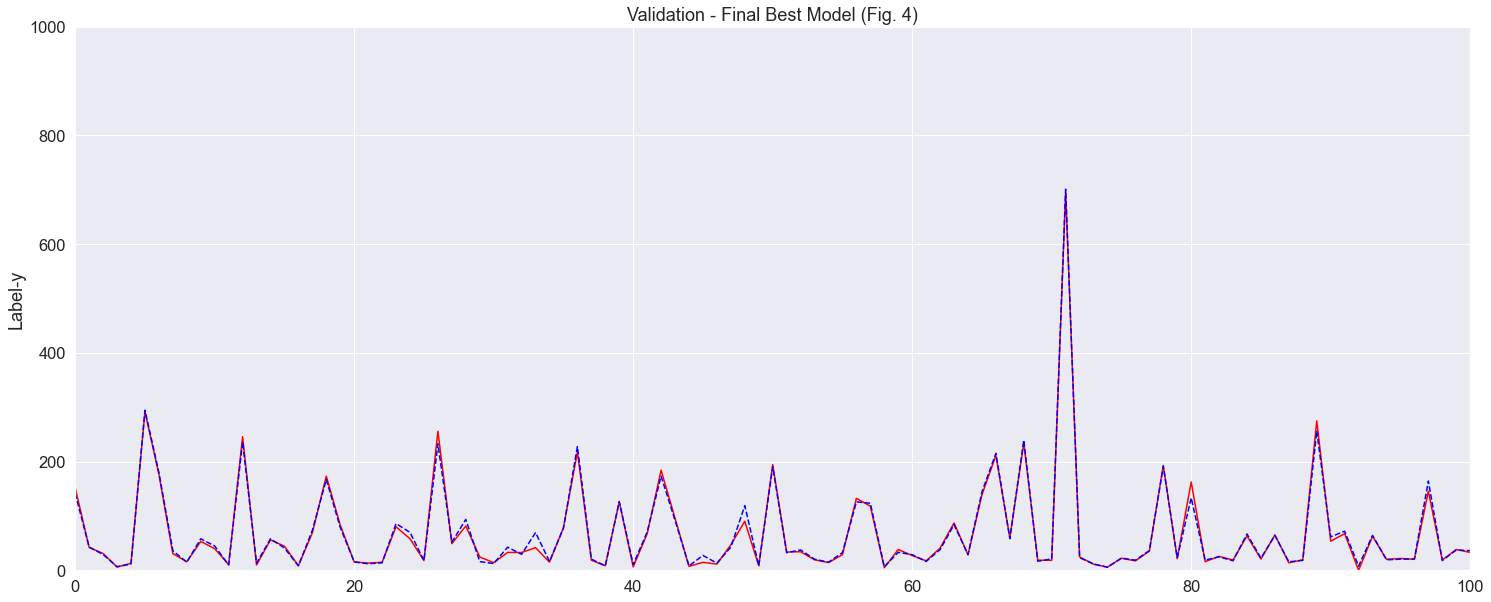

In [64]:
train_pred = final_model.predict(dataset_tr_prepared)
test_pred = final_model.predict(dataset_val_prepared)

plt.figure(figsize = [25, 10])

#Test graph

print('Performance of the final model:\n', print_evaluate(dataset_val_y, test_pred))

plt.plot(dataset_val_y, color='red', label="Actual")
plt.plot(test_pred, color='blue', label="predicted test", linestyle='--')
plt.title("Validation - Final Best Model (Fig. 4)")
plt.ylabel('Label-y')
plt.ylim((0,1000))
plt.xlim((0,100))

fig.tight_layout(pad=5.0)
plt.show()

Our Generalised Model is providing a score of 88.37%

#### Computing a 95% confidence interval for the generalisation error <br><br>
using scipy.stats.t.interval()

In [65]:
from scipy import stats
confidence=0.95
squared_errors=(final_predictions-dataset_val_y)**2

np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([         nan, 133.19309039])

The prediction errors are likely to be within this range. Unfortunate, the lower limit came as nan

## FInal Prediction of **FRP** using the Test Data Set

In [66]:
#The data set to be used for the final test is preprocessed already and 
#stored as dataset_te_X
dataset_te.shape

(15001, 8)

In [67]:
X_test = full_pipeline.fit_transform(dataset_te) 
predicted_frp = final_model.predict(X_test)
predicted_frp

array([ 76.29333333, 403.08666667,  18.79666667, ...,  27.55      ,
        14.54333333,  61.59      ])

Saving final predicted values to CSV

In [68]:
df = pd.DataFrame(predicted_frp)
df.to_csv('predicted_frp_Group3.csv')